
# Exports

# Experiments:


- Without density

- With density

- With density + gdpcap

- With density + gdpcap + wto + contig

- With density + pci + gdpcap + wto + contig

- With density + pop 

In [1]:
%load_ext autotime
%matplotlib inline

time: 1.33 s (started: 2023-07-07 16:44:49 +03:00)


In [2]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 1.81 s (started: 2023-07-07 16:44:51 +03:00)


In [3]:
# Reading the data
data =  pd.read_csv('Data/SimpleApproach/Exports/DataExports.csv')
data

,refYear,reporterCode,partnerCode,distw_harmonic,contig,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,...,wto_o,wto_d,refMonth,partner2Code,cmdCode,primaryValue,2HScmdCode,4HScmdCode,pci,density
0,2016,12.0,4.0,5758.0,0.0,1.560796e+08,1.946902e+07,3.844,0.562,40606.052,...,0.0,1.0,7,0,852352,90.962,85,8523,1.861445,0.010339
1,2016,12.0,36.0,16444.0,0.0,1.560796e+08,1.204616e+09,3.844,49.928,40606.052,...,0.0,1.0,7,0,852352,83.845,85,8523,1.861445,0.010339
2,2016,12.0,40.0,1693.0,0.0,1.560796e+08,3.864278e+08,3.844,44.177,40606.052,...,0.0,1.0,6,0,852352,74.946,85,8523,1.861445,0.010339
3,2016,12.0,51.0,3587.0,0.0,1.560796e+08,1.054733e+07,3.844,3.606,40606.052,...,0.0,1.0,5,0,852352,74.617,85,8523,1.861445,0.010339
4,2016,12.0,56.0,1628.0,0.0,1.560796e+08,4.663657e+08,3.844,41.096,40606.052,...,0.0,1.0,9,0,852352,111.245,85,8523,1.861445,0.010339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102321939,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,8,0,220890,277.000,22,2208,-0.189242,0.054334
102321940,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,8,0,870710,1076.000,87,8707,3.884524,0.027991
102321941,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,8,0,930621,10111.000,93,9306,1.961242,0.031797
102321942,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,9,0,283531,294.000,28,2835,1.207237,0.036452


time: 10min 8s (started: 2023-07-07 16:44:53 +03:00)


In [4]:
def MPE(Y_actual,Y_Predicted):
    mape = np.mean((Y_actual - Y_Predicted)/Y_actual)*100
    return mape

def MAPE(Y_actual,Y_Predicted):
    mpe = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mpe

data['primaryValue'] = data['primaryValue']/1000000
data['gdp_o'] = data['gdp_o']/1000000
data['gdp_d'] = data['gdp_d']/1000000
data['gdpcap_o'] = data['gdpcap_o']/1000000
data['gdpcap_d'] = data['gdpcap_d']/1000000
data['distw_harmonic'] = data['distw_harmonic']/1000

time: 4.7 s (started: 2023-07-07 16:55:01 +03:00)


## RF


In [13]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, oob_score=True,criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  4.9min remaining: 10.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  5.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.8min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.6s remaining:  1.1min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    6.0s remaining:    4.0s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    6.5s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.4s remaining:  1.8min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.87
R2 on validation data: 0.77
OOB Score (R-squared): 0.82
Mean Squared Error: 12.15
Mean Absolute Error: 0.33
Adjusted R^2 Score: 0.77
MAPE:  272277.8139679188
MPE:  -272261.42420420324
time: 9min 54s (started: 2023-07-06 11:30:28 +03:00)


Feature Importances:
 refYear           0.002
distw_harmonic    0.125
gdp_o             0.110
gdp_d             0.206
refMonth          0.005
cmdCode           0.552
dtype: float64


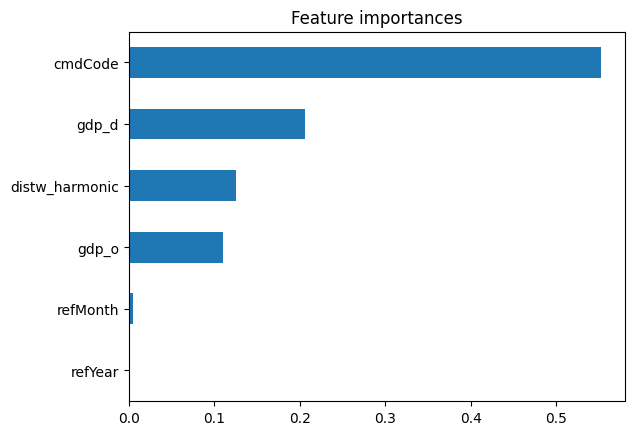

time: 463 ms (started: 2023-07-06 11:40:22 +03:00)


In [14]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

In [16]:
#+density
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10,oob_score=True, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

X_val.shape:  (14773030, 7)
X_train.shape:  (72775883, 7)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25

building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  9.1min remaining: 19.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  9.5min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.9min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.4s remaining:   39.1s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    3.9s remaining:    2.6s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    4.8s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.1s remaining:  1.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.88
R2 on validation data: 0.67
OOB Score (R-squared): 0.85
Mean Squared Error: 19.97
Mean Absolute Error: 0.37
Adjusted R^2 Score: 0.67
MAPE:  274285.90989555075
MPE:  -274270.3782474426
time: 14min 41s (started: 2023-07-06 11:57:19 +03:00)


Feature Importances:
 refYear           0.003
distw_harmonic    0.119
gdp_o             0.079
gdp_d             0.207
refMonth          0.002
cmdCode           0.411
density           0.180
dtype: float64


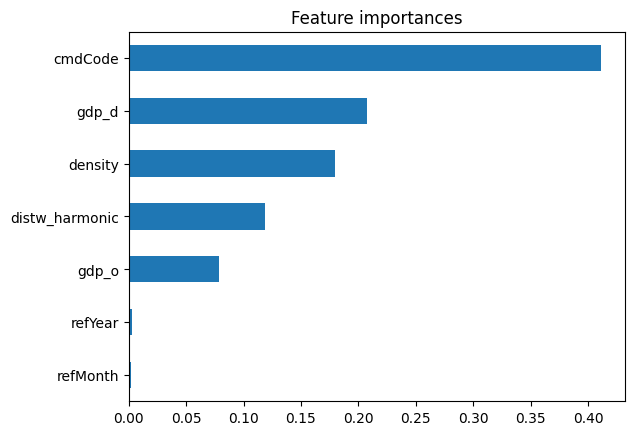

time: 745 ms (started: 2023-07-06 12:12:00 +03:00)


In [17]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 9)
X_train.shape:  (72775883, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 22.4min remaining: 47.7min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 22.8min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 23.4min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.9s remaining:  1.9min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   13.4s remaining:    8.9s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   15.1s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:   23.3s remaining:  4.5min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.89
R2 on validation data: 0.67
OOB Score (R-squared): 0.86
Mean Squared Error: 19.52
Mean Absolute Error: 0.36
Adjusted R^2 Score: 0.67
MAPE:  272931.6267882715
MPE:  -272916.01348942105
Feature Importances:
 refYear           0.001
distw_harmonic    0.100
gdp_o             0.051
gdp_d             0.188
refMonth          0.002
cmdCode           0.405
density           0.184
gdpcap_o          0.041
gdpcap_d          0.027
dtype: float64


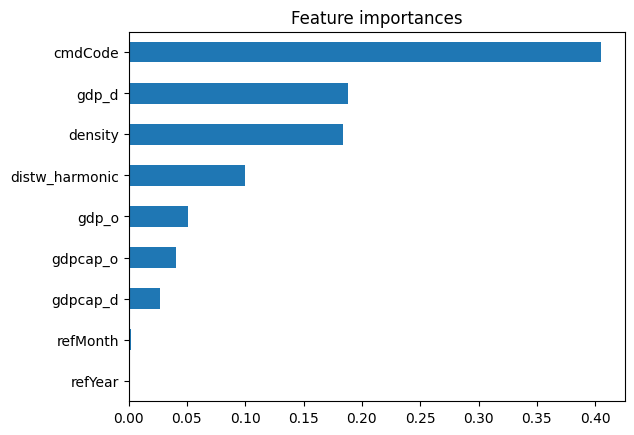

time: 34min 26s (started: 2023-07-06 12:12:00 +03:00)


In [18]:
# +density+gdpcap

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 10)
X_train.shape:  (72775883, 10)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 16.4min remaining: 35.0min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 16.8min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.2min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    4.7s remaining:   53.6s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    5.0s remaining:    3.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    5.6s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.3s remaining:  1.8min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.9
R2 on validation data: 0.61
OOB Score (R-squared): 0.87
Mean Squared Error: 23.99
Mean Absolute Error: 0.36
Adjusted R^2 Score: 0.61
MAPE:  261303.38174487036
MPE:  -261287.5469879168
Feature Importances:
 refYear           0.001
distw_harmonic    0.099
gdp_o             0.049
gdp_d             0.191
refMonth          0.002
cmdCode           0.343
pci               0.102
density           0.154
gdpcap_o          0.037
gdpcap_d          0.023
dtype: float64


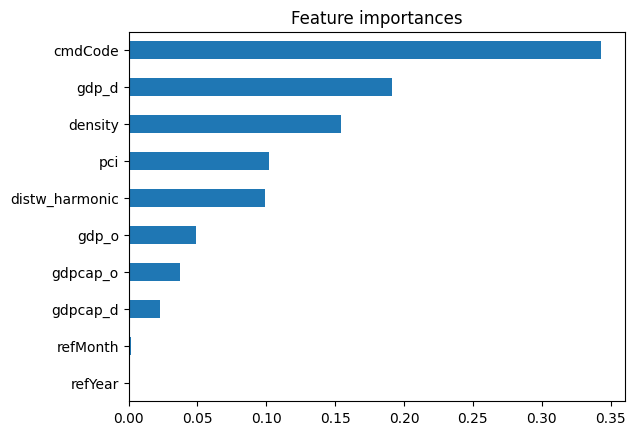

time: 22min 47s (started: 2023-07-06 12:46:27 +03:00)


In [19]:
# +density+gdpcap+pci

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 9)
X_train.shape:  (72775883, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 11.1min remaining: 23.7min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 11.6min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.2min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    4.3s remaining:   49.7s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    5.0s remaining:    3.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    5.5s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.8s remaining:  1.9min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.89
R2 on validation data: 0.58
OOB Score (R-squared): 0.86
Mean Squared Error: 24.0
Mean Absolute Error: 0.36
Adjusted R^2 Score: 0.58
MAPE:  267230.0912822161
MPE:  -267214.3948219025
Feature Importances:
 distw_harmonic    0.098
gdp_o             0.049
gdp_d             0.190
refMonth          0.002
cmdCode           0.339
pci               0.105
density           0.154
gdpcap_o          0.037
gdpcap_d          0.027
dtype: float64


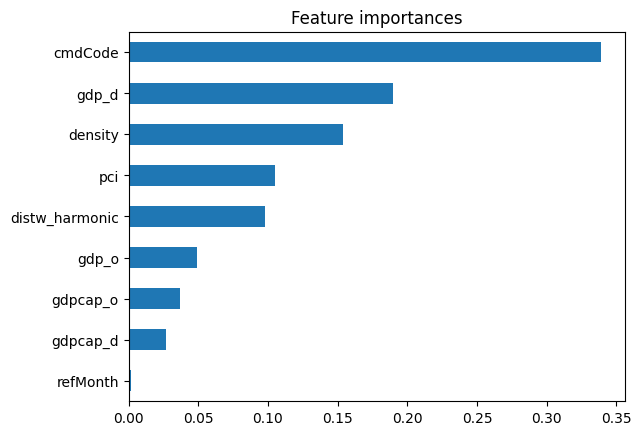

time: 17min 8s (started: 2023-07-06 13:09:15 +03:00)


In [20]:
# +density+gdpcap+pci + No year

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[[ 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

# Log transformations

X_val.shape:  (14773030, 6)
X_train.shape:  (72775883, 6)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  9.2min remaining: 19.5min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 10.1min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 10.3min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.9s remaining:  1.1min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    6.3s remaining:    4.2s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    6.9s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.5s remaining:  1.8min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.35
R2 on training data: 0.32
R2 on validation data: 0.32
MSE:  43.15
MAE:  0.28
R-square:  0.32
MAPE:  11829.95
MPE:  -11754.94
Feature Importances:
 refYear           0.004
distw_harmonic    0.124
gdp_o             0.261
gdp_d             0.205
refMonth          0.001
cmdCode           0.405
dtype: float64


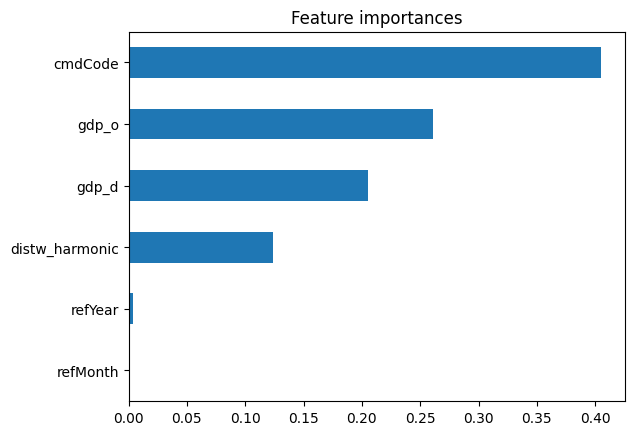

time: 15min 35s (started: 2023-07-06 13:29:38 +03:00)


In [22]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True, min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 7)
X_train.shape:  (72775883, 7)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 14.7min remaining: 31.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 14.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.1min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    8.6s remaining:  1.7min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   12.4s remaining:    8.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   13.5s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:   10.9s remaining:  2.1min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.37
R2 on training data: 0.36
R2 on validation data: 0.03
MSE:  57.62
MAE:  0.29
R-square:  0.03
MAPE:  15251.51
MPE:  -15178.45
Feature Importances:
 refYear           0.004
distw_harmonic    0.122
gdp_o             0.236
gdp_d             0.193
refMonth          0.001
cmdCode           0.278
density           0.167
dtype: float64


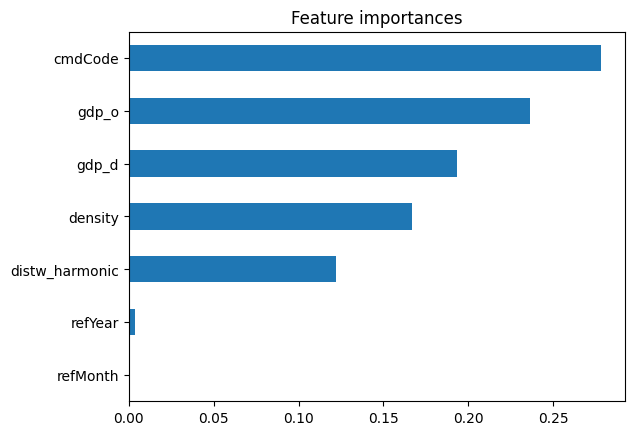

time: 23min 25s (started: 2023-07-07 16:55:05 +03:00)


In [5]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)



X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])


oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 9)
X_train.shape:  (72775883, 9)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 21 of 25
building tree 20 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 15.9min remaining: 33.7min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 16.3min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 16.6min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:   11.8s remaining:  2.3min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   14.9s remaining:    9.9s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   16.5s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.1s remaining:  1.7min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.38
R2 on training data: 0.34
R2 on validation data: 0.07
MSE:  55.01
MAE:  0.29
R-square:  0.07
MAPE:  13545.59
MPE:  -13472.36
Feature Importances:
 refYear           0.002
distw_harmonic    0.095
gdp_o             0.181
gdp_d             0.180
refMonth          0.001
cmdCode           0.258
density           0.176
gdpcap_o          0.077
gdpcap_d          0.030
dtype: float64


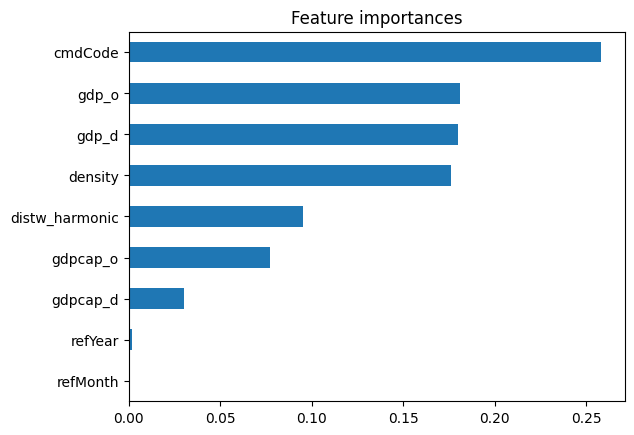

time: 26min 1s (started: 2023-07-07 17:18:31 +03:00)


In [6]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()


X_val.shape:  (14773030, 10)
X_train.shape:  (72775883, 10)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 19.4min remaining: 41.1min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 20.3min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 20.5min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:   12.4s remaining:  2.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   16.5s remaining:   11.0s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   18.6s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:   20.4s remaining:  3.9min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.38
R2 on training data: 0.41
R2 on validation data: 0.04
MSE:  55.83
MAE:  0.29
R-square:  0.04
MAPE:  15038.35
MPE:  -14964.98
Feature Importances:
 refYear           0.002
distw_harmonic    0.094
gdp_o             0.178
gdp_d             0.178
refMonth          0.001
cmdCode           0.226
density           0.169
gdpcap_o          0.078
gdpcap_d          0.029
pci               0.046
dtype: float64


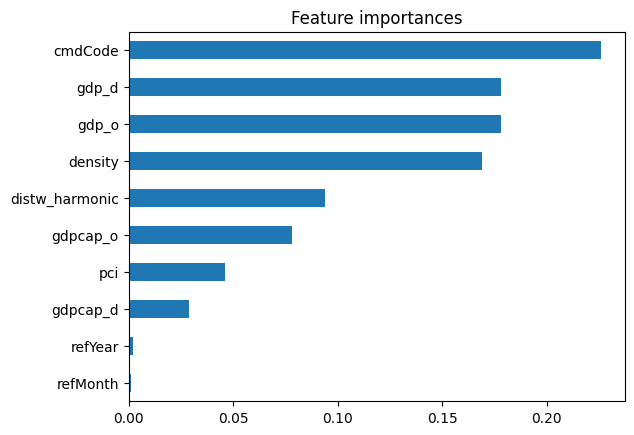

time: 29min 44s (started: 2023-07-07 17:44:33 +03:00)


In [7]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()